## IDS/ACM/CS 158: Fundamentals of Statistical Learning
### PS3, Problem 1: The Validation Set Approach For Model Selection
> Name: Li, Michael
 
> Email address: mlli@caltech.edu

Notes:
Please use python 3.6

You are required to properly comment and organize your code.

* Helper functions (add/remove part label according to the specific question requirements)

In [1]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
import numpy.matlib

def find_beta(data):
    """
    data - a matrix where each row corresponds to the 
           p predictors in the first p columns and
           the observed output y in the final column
    
    returns the OLS estimate of the regression parameter
    """
    x = data[:,:-1]
    y = data[:,-1]

    # add bias term to training data
    bias = np.matlib.repmat(1, len(x), 1)
    x = np.concatenate((bias, x), axis=1)

    # calculate beta
    intermediate = np.matmul(x.transpose(), x)
    inverse_intermediate = np.linalg.inv(np.array(intermediate))
    pseudo_x = np.matmul(inverse_intermediate, x.transpose())

    return np.matmul(pseudo_x, y)

def predict(ols, data):
    """
    ols - ols estimate of the regression parameter
    data - a matrix where each row corresponds to the 
           p predictors in the first p columns and
           the observed output y in the final column
           
    returns the predictions for the observations in data
    """
    x_with_bias_term = np.concatenate((np.matlib.repmat(1, len(data), 1), data[:,:-1]), axis=1)
    return np.matmul(x_with_bias_term, ols)

def l2_loss(data, preds):
    """
    data - a matrix where each row corresponds to the 
           p predictors in the first p columns and
           the observed output y in the final column
    preds - the predictions for the observations in data
    
    returns the L2 loss of the values
    """
    return np.mean((data[:,-1] - preds)**2)

def split_train_test(data, train_indices):
    """
    data - a matrix where each row corresponds to the 
           p predictors in the first p columns and
           the observed output y in the final column
    train_indices - indices for the training data
    
    returns the train and test data split using indices
    """
    train_data = data[train_indices]
    val_data = np.delete(data, train_indices, axis=0)
    
    return train_data, val_data

def validation_err(data, indices):
    """
    data - a matrix where each row corresponds to the 
           p predictors in the first p columns and
           the observed output y in the final column
    indices - indices for the training data
    
    returns the validation error of the data training on the indices
    """
    train, val = split_train_test(data, indices)
    reg = find_beta(train)
    preds = predict(reg, val)
    
    return l2_loss(val, preds)

In [2]:
# reformat data so we have 3 models
f_1_data = np.genfromtxt('dataset5.csv', delimiter=',',skip_header =1)
f_2_data = np.array([[f_1_data[i][0], np.sin(f_1_data[i][1]), f_1_data[i][2]] for i in range(len(f_1_data))])
f_3_data = np.delete(f_1_data, 1, axis=1)

In [3]:
f_1_errs = []
f_2_errs = []
f_3_errs = []
r = 20

for _ in range(r):
    # randomly choose training indices
    train_indices = numpy.random.choice(len(f_1_data), int(len(f_1_data)/2), replace=False)
    
    # find validation errors for each dataset
    f_1_errs.append(validation_err(f_1_data, train_indices))
    f_2_errs.append(validation_err(f_2_data, train_indices))
    f_3_errs.append(validation_err(f_3_data, train_indices))

# add the average error just to see
f_1_errs.append(np.mean(f_1_errs))
f_2_errs.append(np.mean(f_2_errs))
f_3_errs.append(np.mean(f_3_errs))

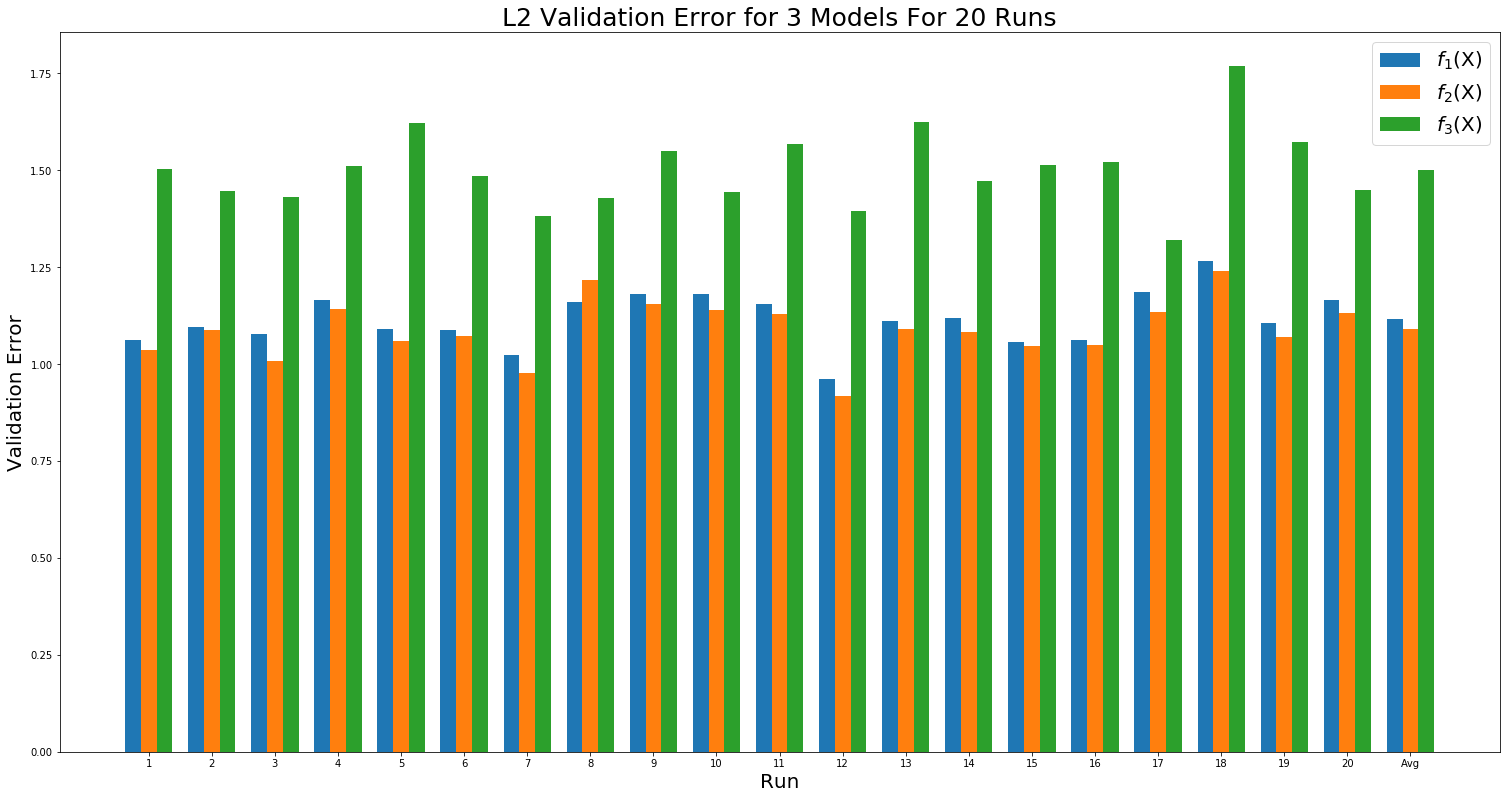

In [4]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
barwidth = .25

x = np.arange(len(f_1_errs))

ax.bar(x + 0.00, f_1_errs, width=barwidth, label='$f_1$(X)')
ax.bar(x + 0.25, f_2_errs, width=barwidth, label='$f_2$(X)')
ax.bar(x + 0.50, f_3_errs, width=barwidth, label='$f_3$(X)')

ticks = [i+1 for i in range(len(f_1_errs)-1)]
ticks.append('Avg')

plt.xticks([r+barwidth for r in range(len(f_1_errs))], ticks)
plt.ylabel('Validation Error', fontsize=20)
plt.xlabel('Run', fontsize=20)
plt.legend(prop={'size': 20})
plt.title('L2 Validation Error for 3 Models For 20 Runs', fontsize=25)
plt.show()

It looks like from this graph that $f_2$(X) is the best model. It has the lowest average validation error. Additionally, on each run it almost always has the lowest validation error.